# Better SALSA
Given an arbitrary protein (probably from SG) query it in the database and get the top hits back, to try and better assign putative function.
********

## 1. Active Site Database
This database will hold information that allows for better queries of protein function similarity. Rather than using 3D similarity, which could

An example where this is the case is in Beta Clamps, as Scott found in his project. 


This database will be generated with the following steps for many structures in the PDB Database
1. Download structural information from http://pdb.org
2. Run POOL on http://pool.neu.edu to determine active site residues
3. Download POOL results and parse file
4. Open PyMol
5. Use PyMol Python API to remove all but top 25 residues

## 2. Similarity Measurement
Given two entries in the Active Site Database, compute the similarity by a 3D alignment, such as MUSTANG. For the purpose of the experiment, let's compare the results of active site alignment versus total 3D alignment, side by side.


### Active Site Alignment
It migh also be interesting to do a sequence alignment on the active site. This information sort of exists in places like PFAM that hold information about the consensus sequence of protein families. 


## 3. Test Data Set
Check Ondrechen's group's pubications on SALSA to see some examples of incorrect putative annotations, and then the proper annotations. Can this method make the same assertions? Given a family of proteins with lab-tested function, can we take one out and get the correct assignment back?

### To Consider
* How to deal with multimers (homodimers, heterodimers, homotrimers, etc...)
* Keep it all scripted
* Jupyter and PyMol http://github.com/cxhernandez/ipymol

## Code

### Command Line Arguments


In [2]:
import numpy as np
import pandas

In [3]:
working_directory = "~/dev/salsa"

pdb_code = "4NZJ"
pdb_file = "/Users/cthoyt/dev/notebooks/4NZJ.pdb"
pdb_pool = "/Users/cthoyt/dev/notebooks/4NZJ.pool.csv"

url =  "http://129.10.88.55:8080/wPOOL/Results/1OPY.jsp"
url2 = "http://129.10.88.55:8080/wPOOL/Results/1838043.poolranks"

"""
html
div#container
div#mainContent
table (first occurrence)
tbody
tr (third)
td (second)
innerHTML

from htmldom import htmldom
dom = htmldom.HtmlDom(url)
dom.createDom()
x = dom.find("#mainContent>table:first-of-type>tbody>tr:nth-of-type(3)>td:nth-of-type(2)")
print(dir(x[0]))
x = x[0].text()
#x = x.children()

print("O: {}".format(x))
#print([y.text() for y in x])
"""
        

'\nhtml\ndiv#container\ndiv#mainContent\ntable (first occurrence)\ntbody\ntr (third)\ntd (second)\ninnerHTML\n\nfrom htmldom import htmldom\ndom = htmldom.HtmlDom(url)\ndom.createDom()\nx = dom.find("#mainContent>table:first-of-type>tbody>tr:nth-of-type(3)>td:nth-of-type(2)")\nprint(dir(x[0]))\nx = x[0].text()\n#x = x.children()\n\nprint("O: {}".format(x))\n#print([y.text() for y in x])\n'

### Load Parsed POOL Data

In [4]:
d = pandas.DataFrame.from_csv(path=pdb_pool)
d["Residue_Number"][:10]

Rank
1     241
2     277
3     297
4     342
5     340
6     243
7     203
8     165
9     161
10    207
Name: Residue_Number, dtype: int64

### Load and Manipulate Structure

In [5]:
from Bio.PDB import *

p = PDBParser()
s = p.get_structure(pdb_code, pdb_file)
s = s[0] # should only be length 1

se = set(d["Residue_Number"][:50])

for chain in s:
    for residue in list(chain.get_residues()):
        rid = residue.get_id()
        if rid[1] not in se:
            chain.detach_child(rid)

io = PDBIO()
io.set_structure(s)
io.save("/Users/cthoyt/dev/notebooks/4NZJ_cut.pdb")

In [6]:
%matplotlib inline
from ipymol import viewer as pymol
pymol.start()   # Start PyMOL RPC server

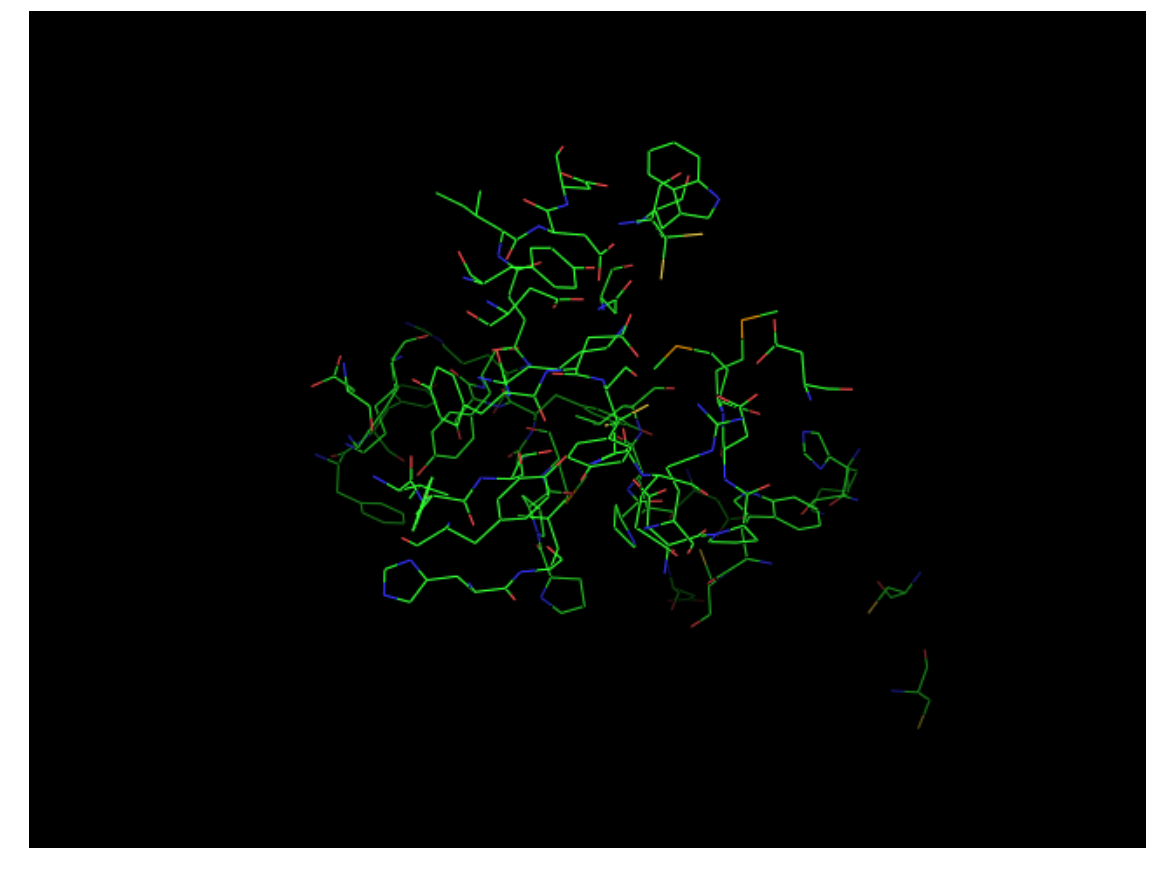

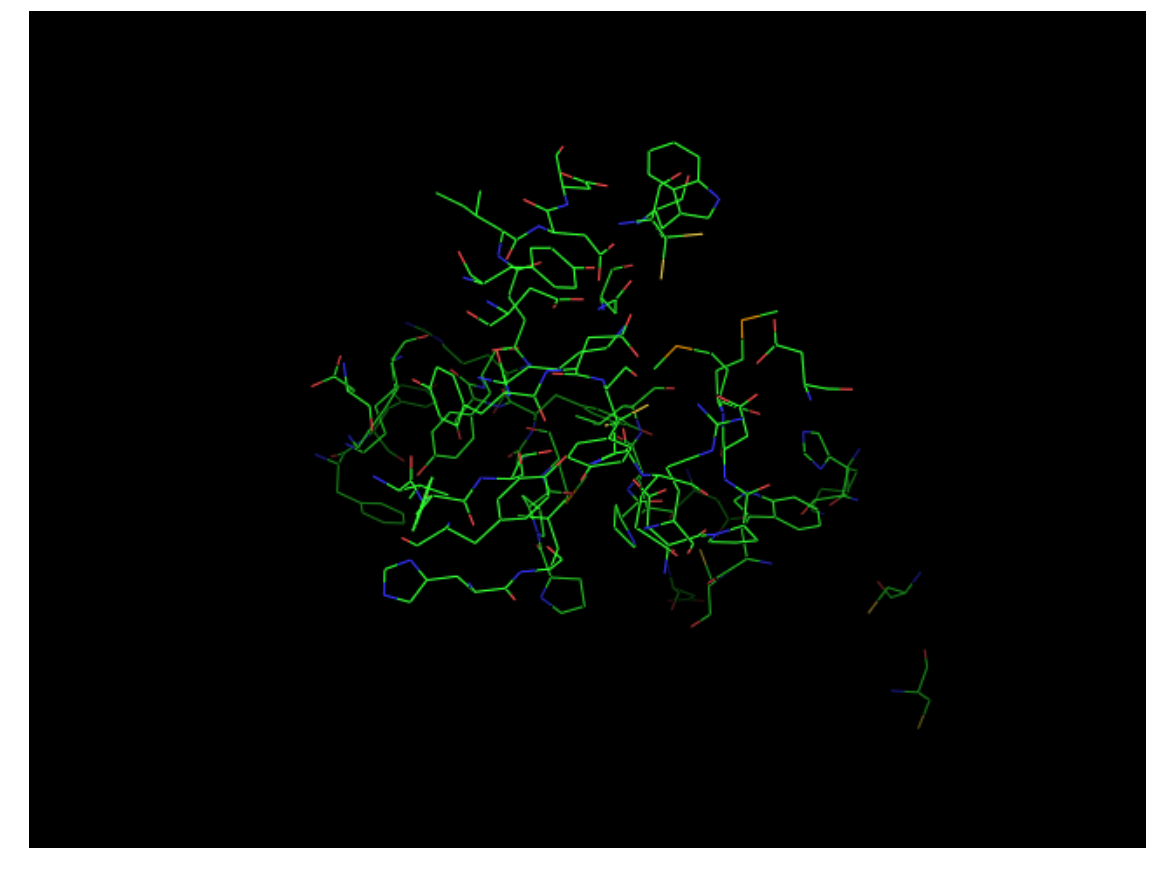

In [7]:
pymol.do('load /Users/cthoyt/dev/notebooks/4NZJ_cut.pdb')
pymol.show()

# Comparisons
Now we will do the same procedure on a protein of known function, 1UAS and compare the active site of 4NZJ.

In [8]:
as2 = p.get_structure("1UAS", "/Users/cthoyt/dev/notebooks/1UAS_cut.pdb")

In [18]:
import Bio.PDB
#sa = Bio.PDB.StructureAlignment("ALIGNMENT?", s, as2) 
si = Bio.PDB.Superimposer()
dir(si)
#dir(Bio.PDB.Superimposer)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'apply',
 'rms',
 'rotran',
 'set_atoms']